In [2]:
import os

file_path = 'C:/Users/Asus/Desktop/safezone/YOLOv8-Fire-and-Smoke-Detection-main/content/fire-8/data.yaml'
if os.path.exists(file_path):
    print("File exists!")
else:
    print("File does not exist at the specified path.")


File exists!


In [3]:
#%nvidia-smi

In [4]:
HOME = "C:/Users/Asus/Desktop/safezone/YOLOv8-Fire-and-Smoke-Detection-main"
print(HOME)

C:/Users/Asus/Desktop/safezone/YOLOv8-Fire-and-Smoke-Detection-main


In [5]:
%pip install ultralytics==8.0.134

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.134  Python-3.8.0 torch-2.0.1+cpu CPU
Setup complete  (16 CPUs, 31.4 GB RAM, 100.6/199.9 GB disk)


In [6]:
%pip install cuda-python

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [7]:
from ultralytics import YOLO

from IPython.display import display, Image

In [8]:
# https://docs.nvidia.com/deeplearning/tensorrt/archives/tensorrt-820-ea/quick-start-guide/index.html#installing-pip
%pip install nvidia-pyindex
%pip install nvidia-tensorrt

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [17 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\Asus\AppData\Local\Temp\pip-install-36pxr5r0\nvidia-tensorrt_4001d4e4649848239441548be953343c\setup.py", line 150, in <module>
          raise RuntimeError(open("ERROR.txt", "r").read())
      RuntimeError:
      ###########################################################################################
      The package you are trying to install is only a placeholder project on PyPI.org repository.
      This package is hosted on NVIDIA Python Package Index.
      
      This package can be installed as:
      ```
      $ pip install nvidia-pyindex
      $ pip install nvidia-tensorrt
      ```
      ##################################################################################

In [9]:
#%cd {HOME}
#!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

In [10]:
#%cd {HOME}
#Image(filename='dog.jpeg', height=600)

In [11]:
#model = YOLO(f'{HOME}/yolov8n.pt')
#results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

In [12]:
#results[0].boxes.xyxy

In [13]:
#results[0].boxes.conf

In [14]:
#results[0].boxes.cls

In [15]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
%pip install roboflow --quiet

%pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="yVJd0wVt07UXqKTfB1Ph")
project = rf.workspace("custom-thxhn").project("fire-wrpgm")
dataset = project.version(8).download("yolov8")


C:\Users\Asus\Desktop\safezone\YOLOv8-Fire-and-Smoke-Detection-main\datasets


The syntax of the command is incorrect.


Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to fire-8 in yolov8:: 100%|██████████| 1970/1970 [00:00<00:00, 2580.51it/s]


In [16]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={HOME}/datasets/fire-8/data.yaml epochs=5 imgsz=800 plots=True

C:\Users\Asus\Desktop\safezone\YOLOv8-Fire-and-Smoke-Detection-main
^C


In [ ]:
#!ls {HOME}/runs/detect/train/

'ls' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\Asus\Desktop\safezone\YOLOv8-Fire-and-Smoke-Detection-main


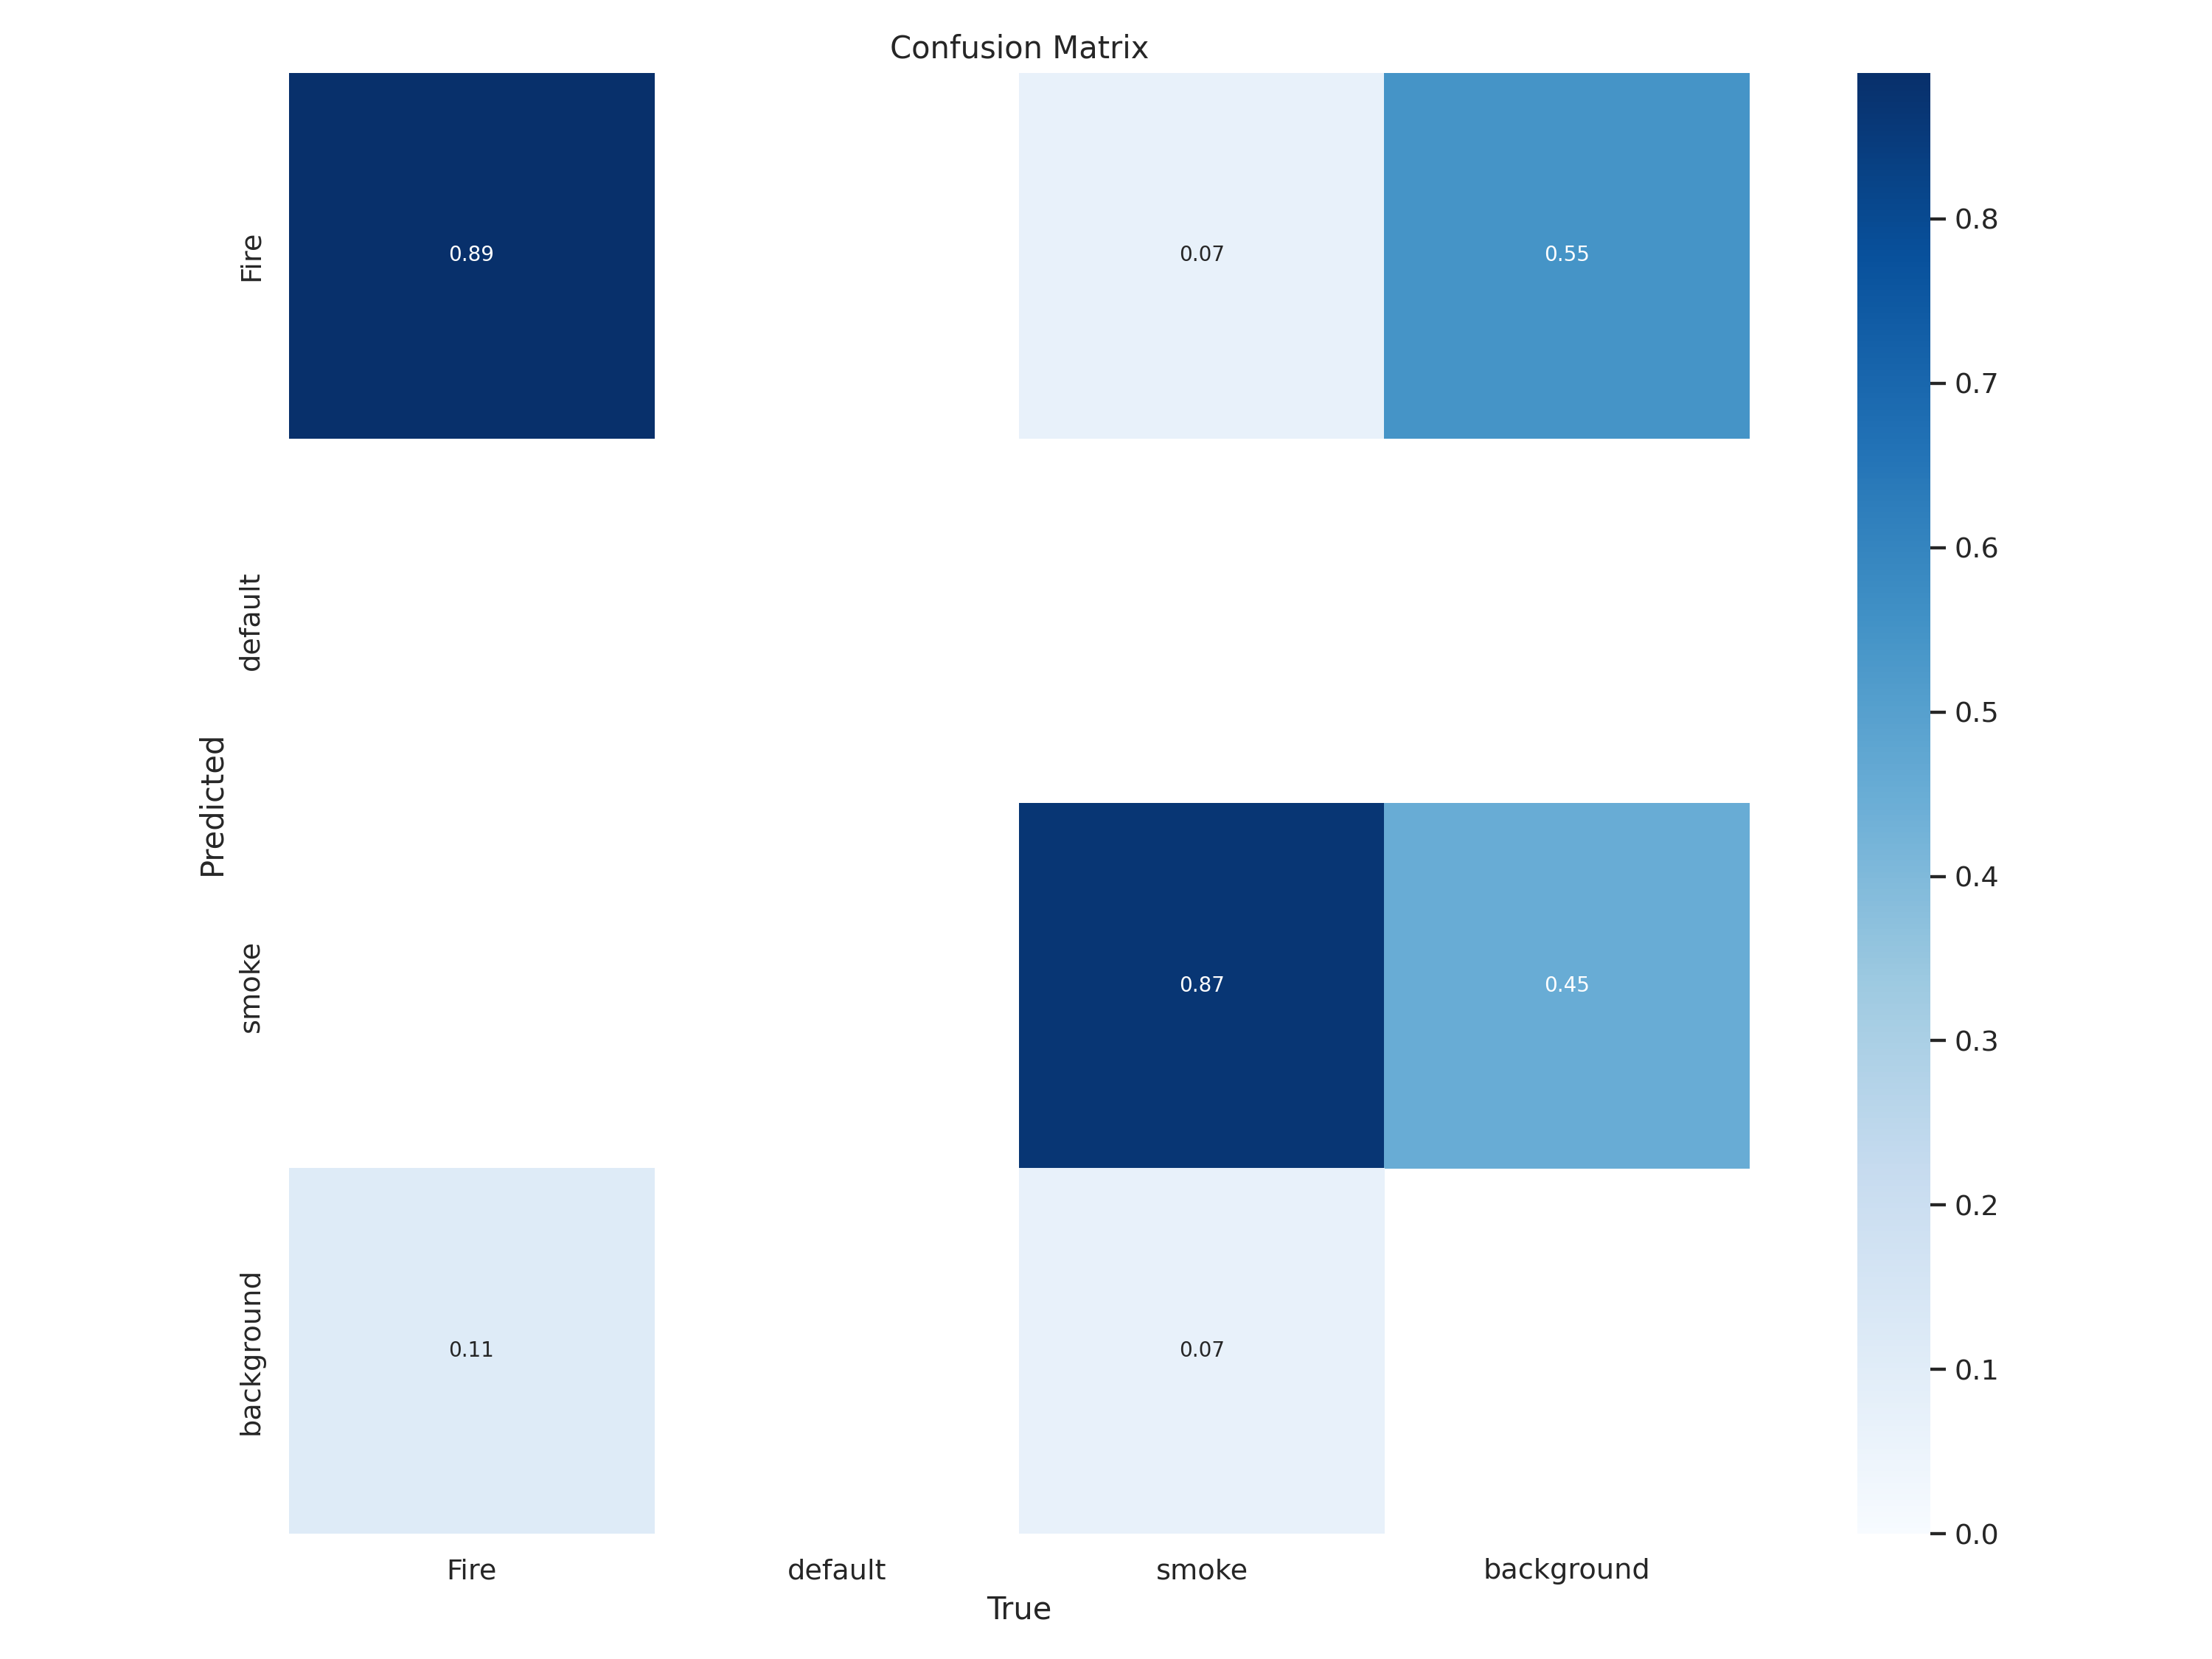

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

C:\Users\Asus\Desktop\safezone\YOLOv8-Fire-and-Smoke-Detection-main


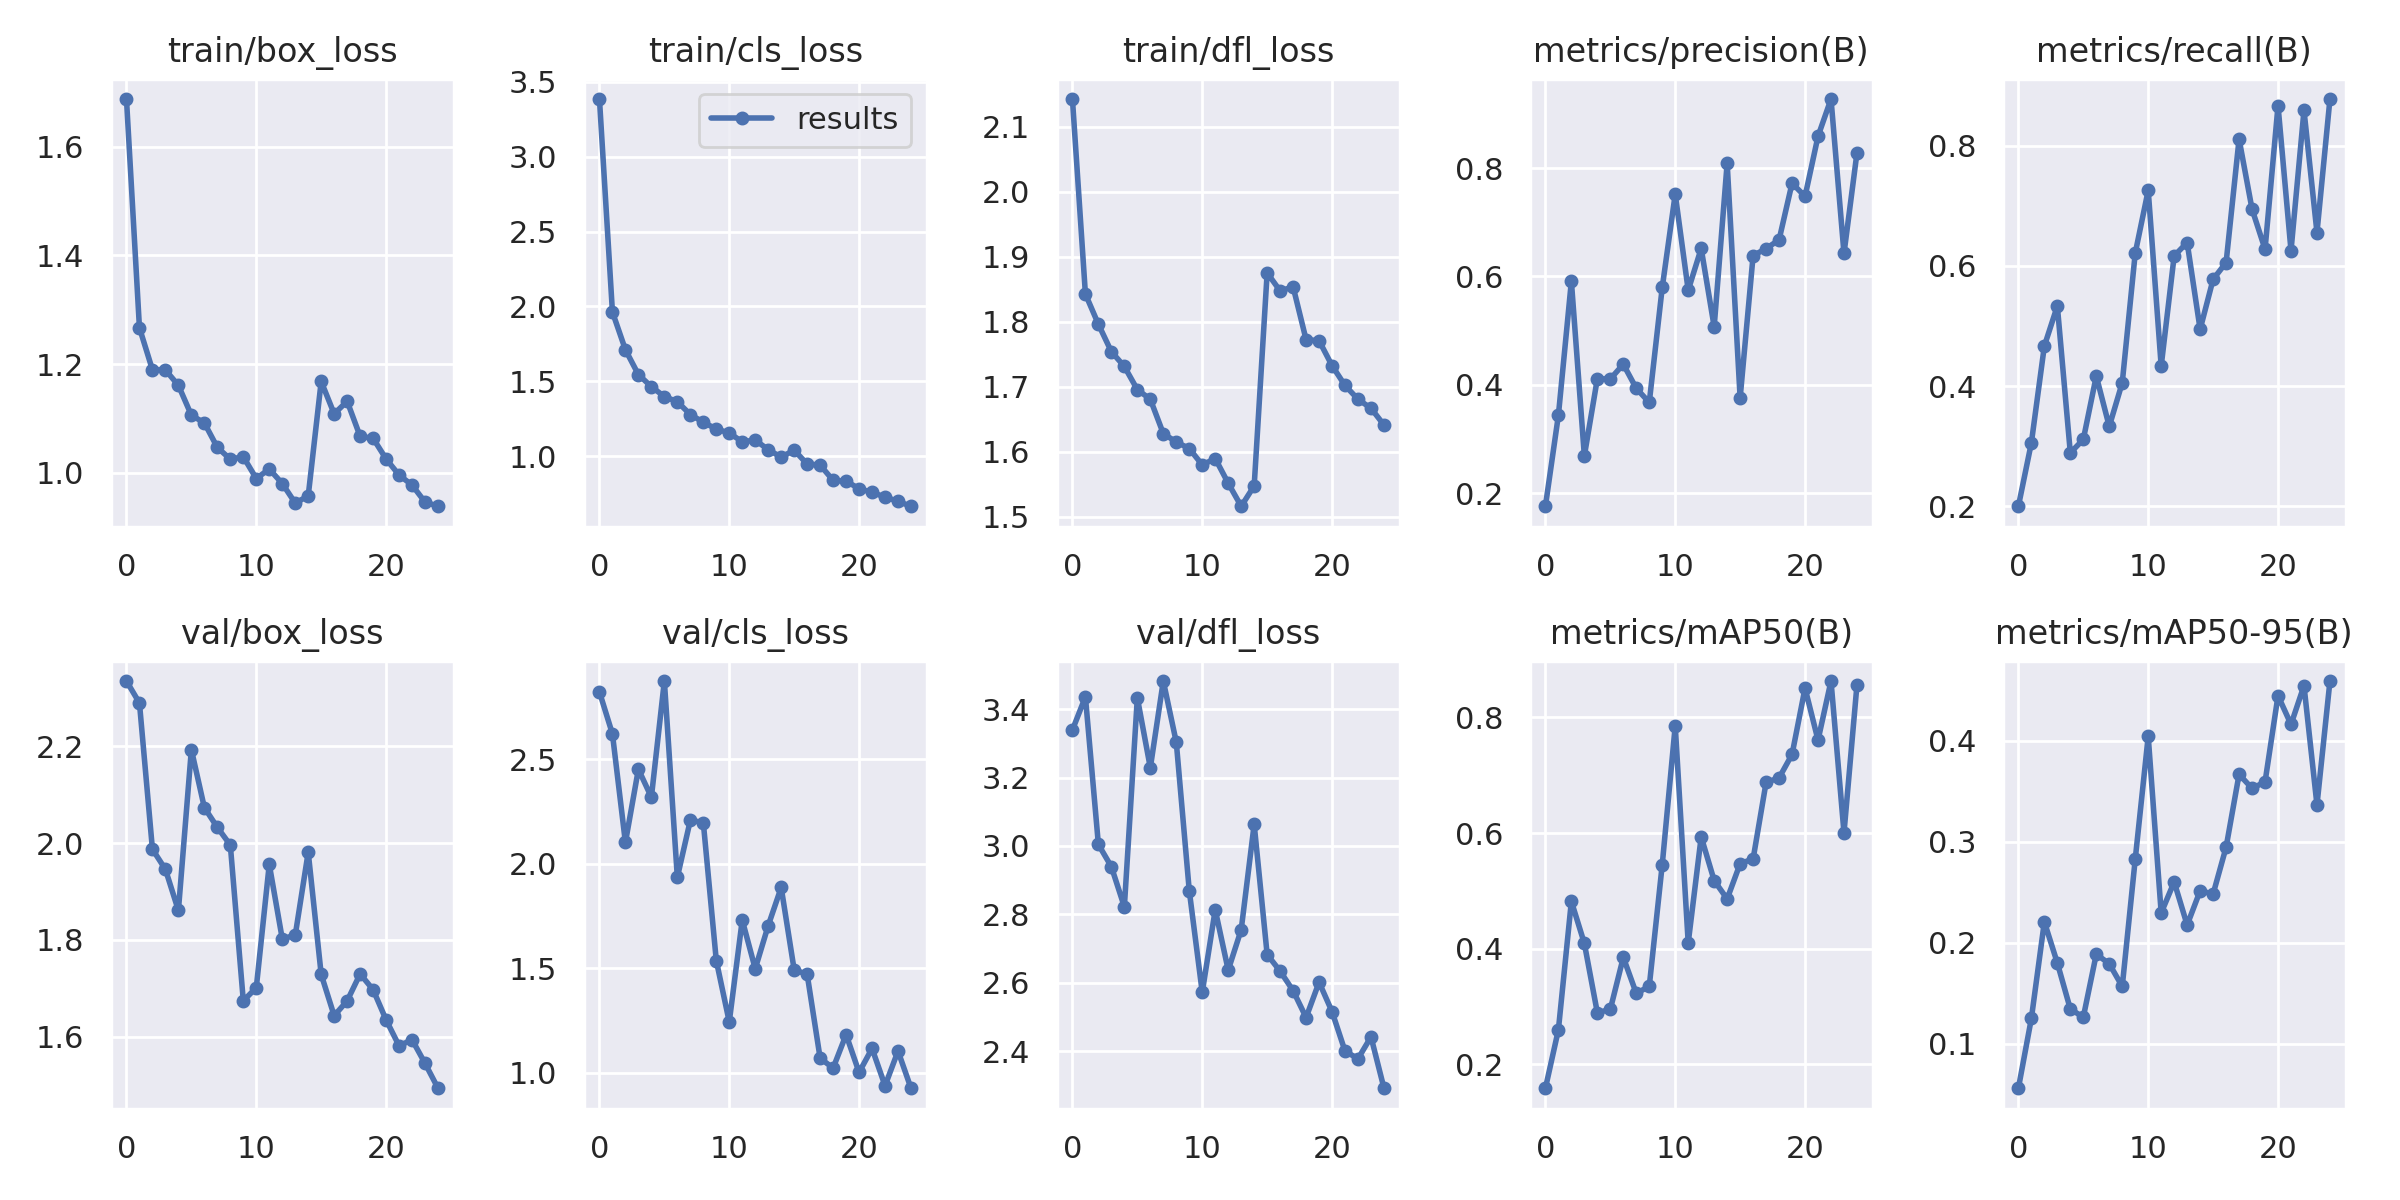

In [18]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

C:\Users\Asus\Desktop\safezone\YOLOv8-Fire-and-Smoke-Detection-main


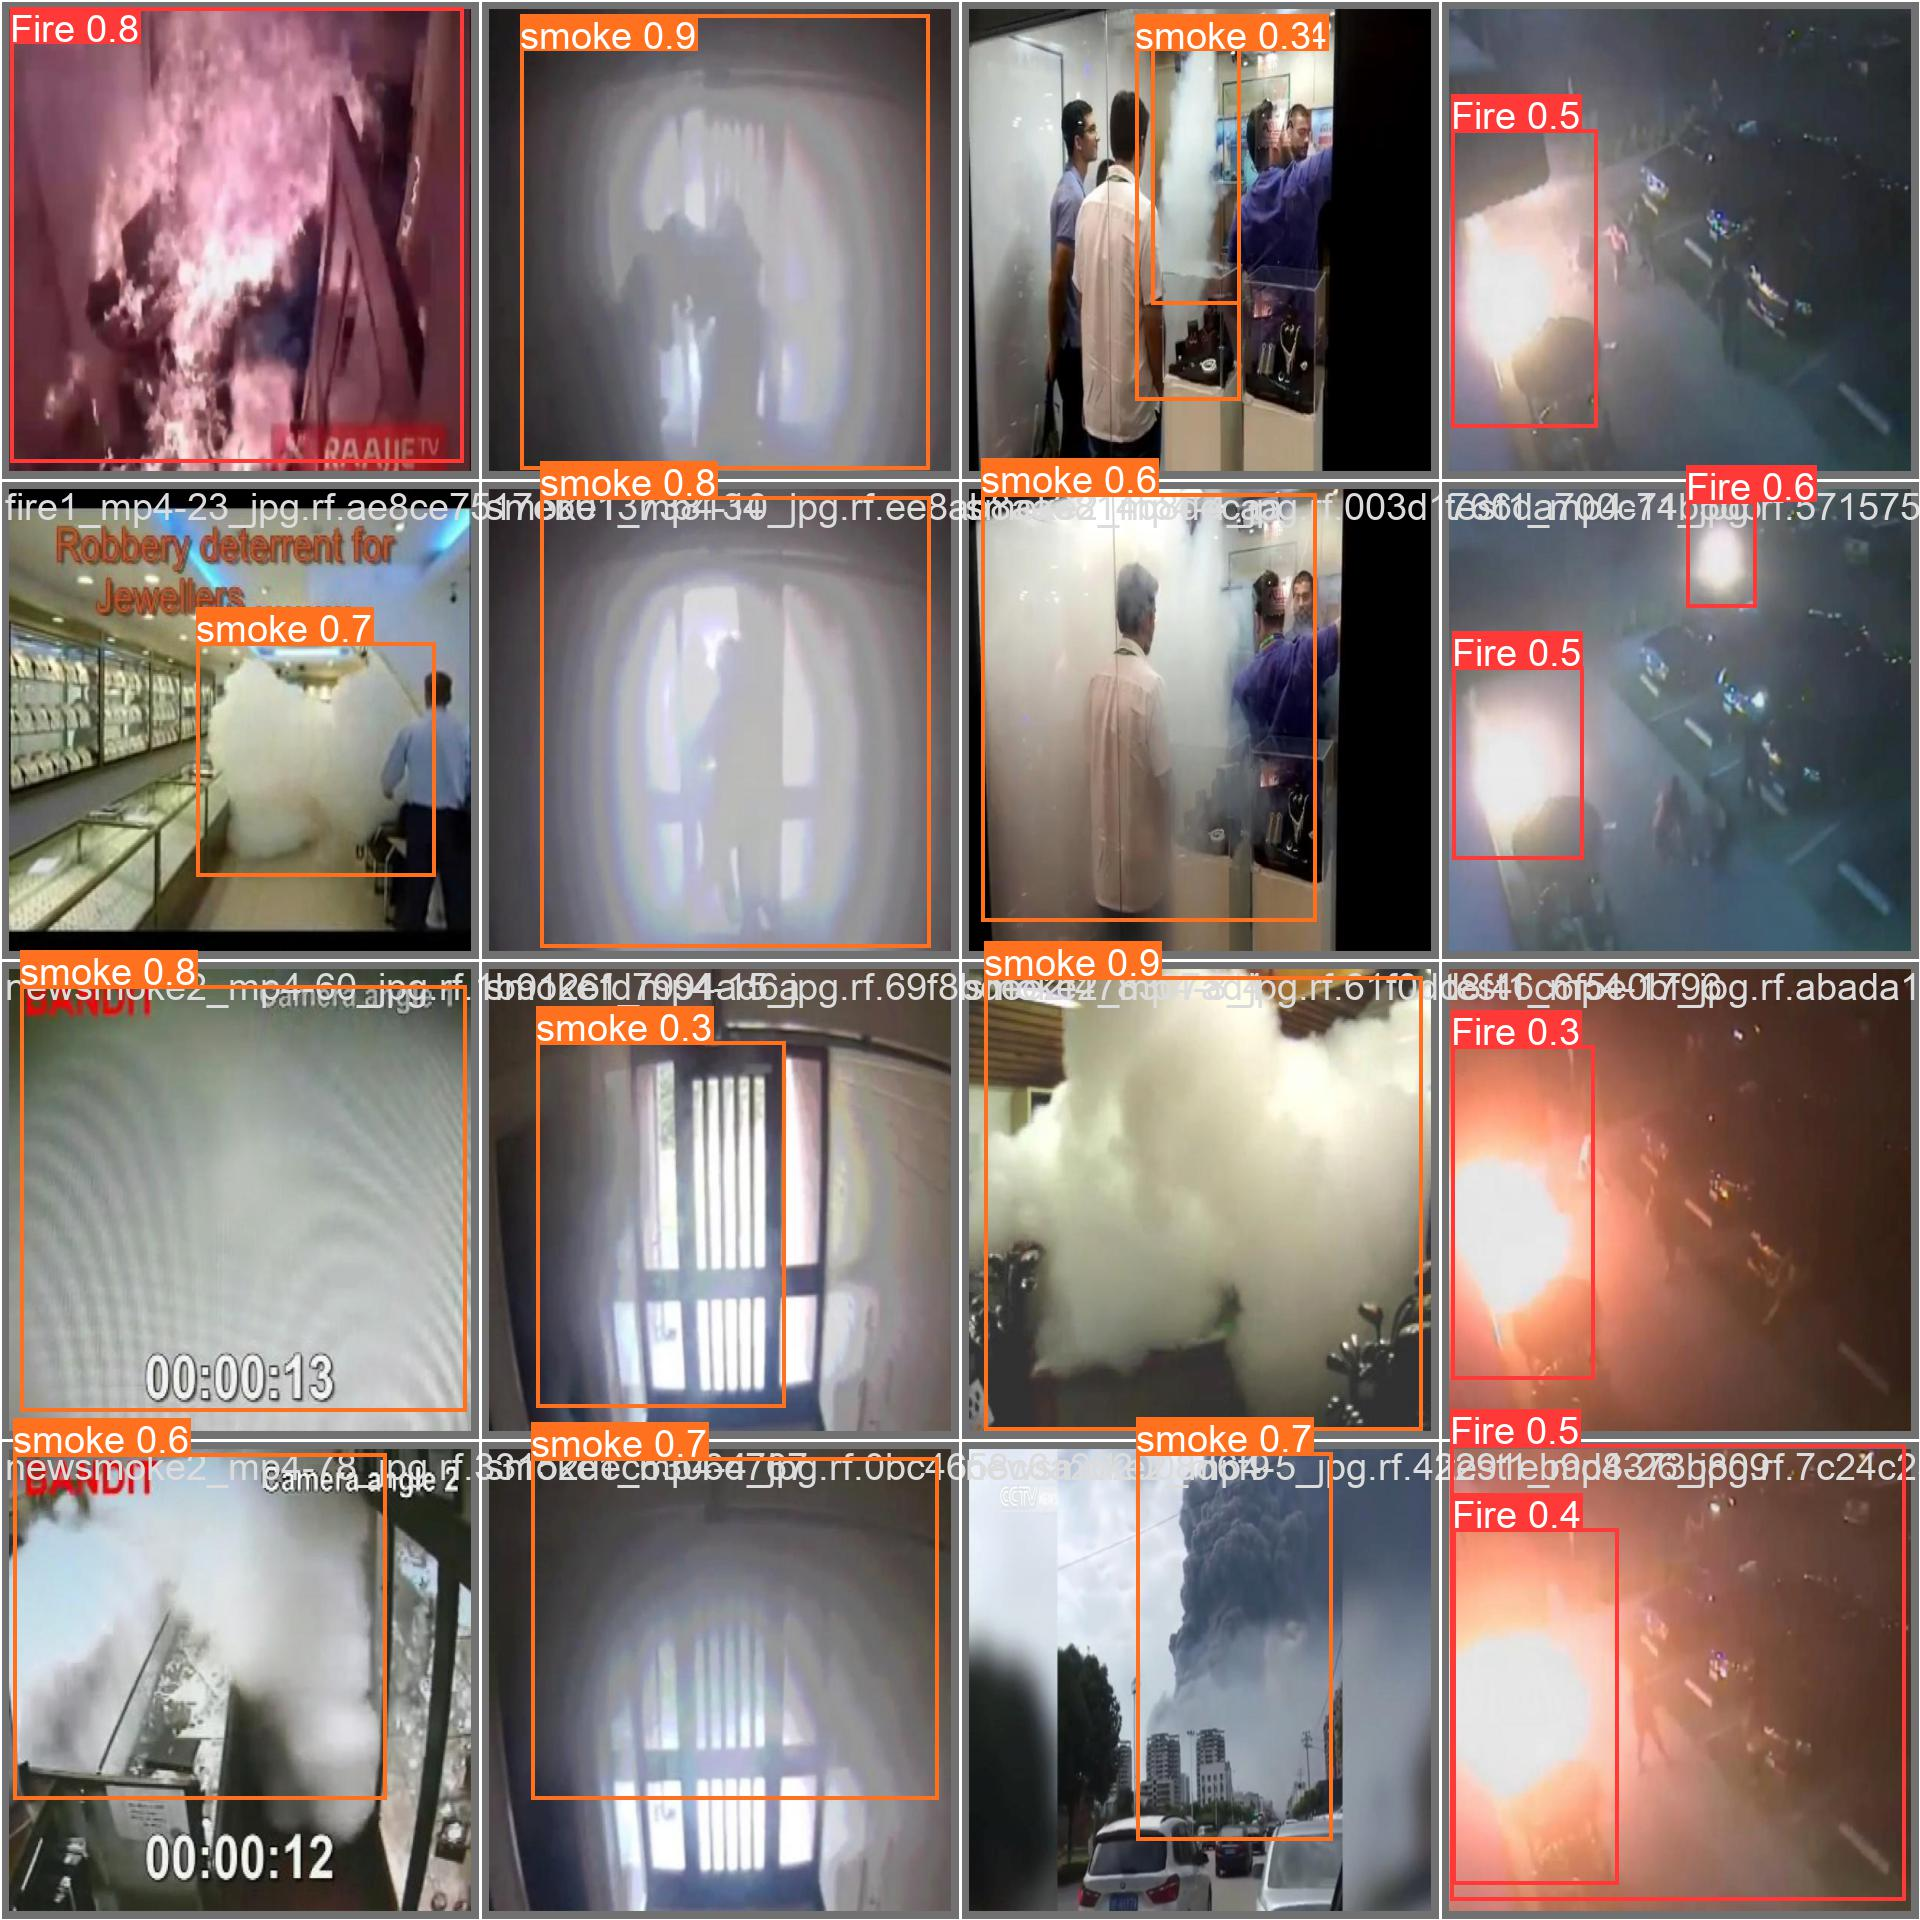

In [19]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [20]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

C:\Users\Asus\Desktop\safezone\YOLOv8-Fire-and-Smoke-Detection-main


Ultralytics YOLOv8.0.134  Python-3.8.0 torch-2.0.1+cpu CPU
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

val: Scanning C:\Users\Asus\Desktop\safezone\YOLOv8-Fire-and-Smoke-Detection-main\datasets\fire-8\valid\labels.cache... 47 images, 0 backgrounds, 0 corrupt: 100%|██████████| 47/47 [00:00<?, ?it/s]
val: Scanning C:\Users\Asus\Desktop\safezone\YOLOv8-Fire-and-Smoke-Detection-main\datasets\fire-8\valid\labels.cache... 47 images, 0 backgrounds, 0 corrupt: 100%|██████████| 47/47 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  33%|███▎      | 1/3 [00:10<00:20, 10.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  67%|██████▋   | 2/3 [00:22<00:11, 11.38s/it]
                 Class     Images  Instances      Box(P         

In [26]:

%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='{HOME}/demo.mp4' save=True


C:\Users\Asus\Desktop\safezone\YOLOv8-Fire-and-Smoke-Detection-main


Ultralytics YOLOv8.0.134  Python-3.8.0 torch-2.0.1+cpu CPU
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (1/515) C:\Users\Asus\Desktop\safezone\YOLOv8-Fire-and-Smoke-Detection-main\demo.mp4: 480x800 1 Fire, 512.0ms
video 1/1 (2/515) C:\Users\Asus\Desktop\safezone\YOLOv8-Fire-and-Smoke-Detection-main\demo.mp4: 480x800 1 Fire, 447.2ms
video 1/1 (3/515) C:\Users\Asus\Desktop\safezone\YOLOv8-Fire-and-Smoke-Detection-main\demo.mp4: 480x800 1 Fire, 379.0ms
video 1/1 (4/515) C:\Users\Asus\Desktop\safezone\YOLOv8-Fire-and-Smoke-Detection-main\demo.mp4: 480x800 1 Fire, 431.8ms
video 1/1 (5/515) C:\Users\Asus\Desktop\safezone\YOLOv8-Fire-and-Smoke-Detection-main\demo.mp4: 480x800 1 Fire, 441.2ms
video 1/1 (6/515) C:\Users\Asus\Desktop\safezone\YOLOv8-Fire-and-Smoke-Detection-main\demo.mp4: 480x800 1 Fire, 511.7ms
video 1/1 (7/515) C:\Users\Asus\Desktop\safezone\YOLOv8-Fire-and-Smoke-Detection-main\demo.mp4: 480x800 1 Fire, 476.2ms
video 1/1 (8/515) C

In [ ]:
'''
%cd {HOME}
from IPython.display import Video

# Replace 'video_path' with the path to your video file

display(Video(url='{HOME}/runs/detect/predict24/demo.avi'))
'''


In [ ]:
'''
from google.colab.patches import cv2_imshow
import cv2

# Replace 'video_source' with the path to your video file or an integer to use a webcam
video_source = '/content/drive/MyDrive/YOLOv8-Fire-and-Smoke-Detection-main/runs/detect/predict24/demo.avi'
cap = cv2.VideoCapture(video_source)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Display the resulting frame
    cv2_imshow(frame)

    # Press 'q' to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture when done
cap.release()
cv2.destroyAllWindows()
'''

In [ ]:
import numpy as np
import time
import glob
from IPython.display import Image,Audio, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")
beep_frequency_hz = 800  # Adjust the frequency as needed
beep_duration_sec = 0.10  # Adjust the duration as needed
pause_duration_sec = 0.10
num_beeps = 100

# Generate a square wave danger beep sound
sample_rate = 44100  # Common sample rate for audio
t = np.linspace(0, beep_duration_sec, int(sample_rate * beep_duration_sec), False)
beep_signal = np.sign(np.sin(2 * np.pi * beep_frequency_hz * t))
pause_signal = np.zeros(int(sample_rate * pause_duration_sec))
signal = np.tile(np.concatenate((beep_signal, pause_signal)), num_beeps)

audio_display = Audio(signal, rate=sample_rate, autoplay=True)
display(audio_display)
